# Evaluate Molecular Generation Results

In [ ]:
#ssh -L 8090:localhost:8090 node802

In [ ]:
!conda env list

## compare the of csv and hdf files

In [2]:
csv_path = "<PATH>/led3_score/3_molecular_generation/2_evaluate_molecules/full_model/zinc_building_blocks/Q99685_Led3score_chembl_200k/results/ZINC_BB_Q99685_LED3SCORE_CHEMBL200K_FULL_MODEL_results.csv"

# load csv but dont read the trees column with pandas
import pandas 
csv_result = pandas.read_csv(csv_path, usecols = ["target","search_time","first_solution_time","first_solution_iteration","number_of_nodes","max_transforms","max_children","number_of_routes","number_of_solved_routes","top_score","is_solved","number_of_steps","number_of_precursors","number_of_precursors_in_stock","precursors_in_stock","precursors_not_in_stock","precursors_availability","policy_used_counts","profiling","top_scores"])
csv_result.head()

,target,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,top_score,is_solved,number_of_steps,number_of_precursors,number_of_precursors_in_stock,precursors_in_stock,precursors_not_in_stock,precursors_availability,policy_used_counts,profiling,top_scores
0,Cc1cccc(Oc2ccc(CN3CCN(C(=O)OC(C(F)(F)F)C(F)(F)...,29.017107,29.017039,20,114,7,5,27,1,0.975000,True,4,5,5,"Cc1cccc(Oc2ccc(CO)cc2)c1, O=S(Cl)Cl, OC(C(F)(F...",NaN,zinc;zinc;zinc;zinc;zinc,{'uspto': 113},"{'expansion_calls': 106, 'reactants_generation...","0.9750, 0.8393, 0.8393, 0.8393, 0.8393"
1,N#Cc1ccc(CN2CCN(C(=O)OC(C(F)(F)F)C(F)(F)F)CC2)cc1,7.959567,7.959505,5,21,6,4,5,1,0.997629,True,1,2,2,"N#Cc1ccc(CN2CCNCC2)cc1, O=C(Cl)OC(C(F)(F)F)C(F...",NaN,zinc;zinc,{'uspto': 20},"{'expansion_calls': 20, 'reactants_generations...","0.9976, 0.8051, 0.8051, 0.7976, 0.7976"
2,O=C(OC1Oc2ccc(C(O)(C(F)(F)F)C(F)(F)F)cc2O1)C1C...,902.414820,0.000000,0,4499,10,24,1006,0,0.832149,False,8,8,7,"C[Si](C)(C)C(F)(F)F, O=C(Cl)Oc1ccc([N+](=O)[O-...",OC1Oc2ccc(Br)cc2O1,zinc;zinc;zinc;zinc;zinc;Not in stock;zinc;zinc,{'uspto': 4498},"{'expansion_calls': 3493, 'reactants_generatio...","0.8321, 0.8321, 0.8321, 0.8321, 0.8316, 0.8316..."
3,Cc1ccccc1C1CN(C(=O)n2nnc3ccccc32)CCN1,28.268931,28.268859,17,187,10,17,31,1,0.950899,True,8,5,5,"O=C(Cl)n1nnc2ccccc21, CC(C)(C)OC(=O)OC(=O)OC(C...",NaN,zinc;zinc;zinc;zinc;zinc,{'uspto': 186},"{'expansion_calls': 156, 'reactants_generation...","0.9509, 0.7918, 0.7918, 0.7918, 0.7918, 0.7918"
4,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCN(Nc2ccc(F)c(Cl)c...,51.809093,51.809027,23,288,10,17,74,1,0.963447,True,5,3,3,"O=C(Cl)OC(C(F)(F)F)C(F)(F)F, CC(C)(C)OC(=O)N1C...",NaN,zinc;zinc;zinc,{'uspto': 287},"{'expansion_calls': 216, 'reactants_generation...","0.9634, 0.8314, 0.8167, 0.8167, 0.8167"


In [3]:
from multiretro.utils.io import DataReader

from typing import List

def load_values(paths: List[str], key: str = "table"):
    joined_df = None
    for path in paths:
        data_hdf = DataReader.load_hdf(path, key= key)
        if joined_df is None:
            joined_df = data_hdf
        else:
            joined_df = joined_df.append(data_hdf)
            
        joined_df.reset_index(drop=True, inplace=True)
    print(joined_df.columns)
    return joined_df

In [ ]:
result_hdf_path = ["<PATH>/led3_score/3_molecular_generation/2_evaluate_molecules/full_model/zinc_building_blocks/Q99685_Led3score_chembl_200k/results/ZINC_BB_Q99685_LED3SCORE_CHEMBL200K_FULL_MODEL_results.csv_0_.hdf", "<PATH>/led3_score/3_molecular_generation/2_evaluate_molecules/full_model/zinc_building_blocks/Q99685_Led3score_chembl_200k/results/ZINC_BB_Q99685_LED3SCORE_CHEMBL200K_FULL_MODEL_results.csv_1_.hdf"]
hdf_results = load_values(result_hdf_path)
hdf_results.head()

In [5]:
# assert that the target column is the same for azf_results and csv_result
assert (hdf_results["target"] == csv_result["target"]).all()
# drop index column because it is the batch index
#hdf_results.drop(columns=["index"], inplace=True)
hdf_results.head()

,index,target,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,...,number_of_steps,number_of_precursors,number_of_precursors_in_stock,precursors_in_stock,precursors_not_in_stock,precursors_availability,policy_used_counts,profiling,top_scores,trees
0,0,Cc1cccc(Oc2ccc(CN3CCN(C(=O)OC(C(F)(F)F)C(F)(F)...,29.017107,29.017039,20,114,7,5,27,1,...,4,5,5,"Cc1cccc(Oc2ccc(CO)cc2)c1, O=S(Cl)Cl, OC(C(F)(F...",,zinc;zinc;zinc;zinc;zinc,{'uspto': 113},"{'expansion_calls': 106, 'reactants_generation...","0.9750, 0.8393, 0.8393, 0.8393, 0.8393","[{'type': 'mol', 'hide': False, 'smiles': 'Cc1..."
1,1,N#Cc1ccc(CN2CCN(C(=O)OC(C(F)(F)F)C(F)(F)F)CC2)cc1,7.959567,7.959505,5,21,6,4,5,1,...,1,2,2,"N#Cc1ccc(CN2CCNCC2)cc1, O=C(Cl)OC(C(F)(F)F)C(F...",,zinc;zinc,{'uspto': 20},"{'expansion_calls': 20, 'reactants_generations...","0.9976, 0.8051, 0.8051, 0.7976, 0.7976","[{'type': 'mol', 'hide': False, 'smiles': 'N#C..."
2,2,O=C(OC1Oc2ccc(C(O)(C(F)(F)F)C(F)(F)F)cc2O1)C1C...,902.414820,0.000000,0,4499,10,24,1006,0,...,8,8,7,"C[Si](C)(C)C(F)(F)F, O=C(Cl)Oc1ccc([N+](=O)[O-...",OC1Oc2ccc(Br)cc2O1,zinc;zinc;zinc;zinc;zinc;Not in stock;zinc;zinc,{'uspto': 4498},"{'expansion_calls': 3493, 'reactants_generatio...","0.8321, 0.8321, 0.8321, 0.8321, 0.8316, 0.8316...","[{'type': 'mol', 'hide': False, 'smiles': 'O=C..."
3,3,Cc1ccccc1C1CN(C(=O)n2nnc3ccccc32)CCN1,28.268931,28.268859,17,187,10,17,31,1,...,8,5,5,"O=C(Cl)n1nnc2ccccc21, CC(C)(C)OC(=O)OC(=O)OC(C...",,zinc;zinc;zinc;zinc;zinc,{'uspto': 186},"{'expansion_calls': 156, 'reactants_generation...","0.9509, 0.7918, 0.7918, 0.7918, 0.7918, 0.7918","[{'type': 'mol', 'hide': False, 'smiles': 'Cc1..."
4,4,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCN(Nc2ccc(F)c(Cl)c...,51.809093,51.809027,23,288,10,17,74,1,...,5,3,3,"O=C(Cl)OC(C(F)(F)F)C(F)(F)F, CC(C)(C)OC(=O)N1C...",,zinc;zinc;zinc,{'uspto': 287},"{'expansion_calls': 216, 'reactants_generation...","0.9634, 0.8314, 0.8167, 0.8167, 0.8167","[{'type': 'mol', 'hide': False, 'smiles': 'O=C..."


## calculate results on full data

In [6]:
solved_molecules = csv_result[csv_result["is_solved"] == True]
len(solved_molecules)

30765

In [7]:
azf_results = AiZynthfinderResults(hdf_results)
solvability = azf_results.calculate_solvability()
print("The solvability: ", solvability)

The solvability:  30.764999999999997


<AxesSubplot:>

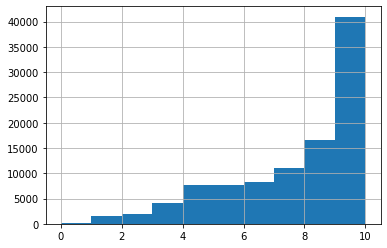

In [8]:
hdf_results["number_of_steps"].hist()

<AxesSubplot:>

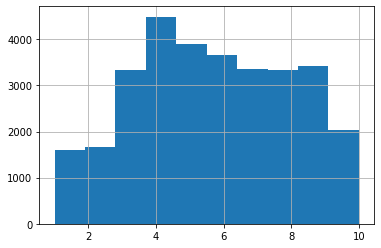

In [9]:
# get solved molecules
solved_molecules = hdf_results[hdf_results["is_solved"] == True]
solved_molecules["number_of_steps"].hist()

## calculate results on desired molecules

In [10]:
dataframe_with_values = "<PATH>/led3_score/data/results/3_molecular_generation/generated_molecules/full_model/used_scorer/chembl200k_led3/generated_molecules/Q99685_chembl200k_led3score_400ep_final_cleaned.csv"
dataframe_with_values = pandas.read_csv(dataframe_with_values)
dataframe_with_values.head()

,LED3Scorer,XGBClassifier,XGBRegressor,SA,SMILES,clean_smiles,clean_smiles_inchi
0,0.986599,0.951234,7.251957,2.446728,Cc1cccc(Oc2ccc(CN3CCN(C(=O)OC(C(F)(F)F)C(F)(F)...,Cc1cccc(Oc2ccc(CN3CCN(C(=O)OC(C(F)(F)F)C(F)(F)...,InChI=1S/C22H22F6N2O3/c1-15-3-2-4-18(13-15)32-...
1,0.978048,0.971914,7.514136,2.491824,N#Cc1ccc(CN2CCN(C(=O)OC(C(F)(F)F)C(F)(F)F)CC2)cc1,N#Cc1ccc(CN2CCN(C(=O)OC(C(F)(F)F)C(F)(F)F)CC2)cc1,"InChI=1S/C16H15F6N3O2/c17-15(18,19)13(16(20,21..."
2,0.286235,0.911148,7.518158,3.892765,O=C(OC1Oc2ccc(C(O)(C(F)(F)F)C(F)(F)F)cc2O1)C1C...,O=C(OC1Oc2ccc(C(O)(C(F)(F)F)C(F)(F)F)cc2O1)C1C...,"InChI=1S/C20H15F12NO7/c21-17(22,23)13(18(24,25..."
3,0.735008,0.967543,7.543328,2.930797,Cc1ccccc1C1CN(C(=O)n2nnc3ccccc32)CCN1,Cc1ccccc1C1CN(C(=O)n2nnc3ccccc32)CCN1,InChI=1S/C18H19N5O/c1-13-6-2-3-7-14(13)16-12-2...
4,0.946415,0.974222,7.636827,2.810514,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCN(Nc2ccc(F)c(Cl)c...,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCN(Nc2ccc(F)c(Cl)c...,InChI=1S/C14H13ClF7N3O2/c15-9-7-8(1-2-10(9)16)...


In [11]:
# assert that the target column is the same for azf_results and csv_result
assert (hdf_results["target"] == dataframe_with_values["clean_smiles"]).all(), "The target column and clean_smiles columns are not the same"

AssertionError: The target column and clean_smiles columns are not the same

In [12]:
# get the differences between the target and clean smiles
hdf_results[hdf_results["target"] != dataframe_with_values["clean_smiles"]]

,index,target,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,...,number_of_steps,number_of_precursors,number_of_precursors_in_stock,precursors_in_stock,precursors_not_in_stock,precursors_availability,policy_used_counts,profiling,top_scores,trees
14139,9,CCOCCCC(C1=C2C=C3C(F)=C1C31CC3C4CC(F)(F)NC2C43...,902.212182,0.0,0,3943,10,21,880,0,...,9,6,5,"O=C(Cl)CCl, CC(C)(C)O, OCC1c2ccccc2-c2ccccc21,...",CCOCCCC(c1c2C3N(C(=O)O)C(F)(F)CC4C5CC6(c(c2)c(...,zinc;zinc;zinc;zinc;Not in stock;zinc,{'uspto': 3942},"{'expansion_calls': 3076, 'reactants_generatio...","0.7920, 0.7918, 0.7918, 0.7918, 0.7918","[{'type': 'mol', 'hide': False, 'smiles': 'CCO..."
16379,9,CSCCC1OC2(OC(F)(F)F)c3c(O)cc4c2c3c4=C2CC(C3C4=...,900.352245,0.0,0,6052,10,33,2233,0,...,8,6,5,"OC(C(F)(F)F)C(F)(F)F, O=C1CCC(=O)N1O, O=C(O)O,...",COC(=O)CCC(CCC1CN(C(=O)OC(C)(C)C)C2CC1=c1c3cc(...,zinc;zinc;zinc;zinc;Not in stock;zinc,{'uspto': 6051},"{'expansion_calls': 3907, 'reactants_generatio...","0.7926, 0.7920, 0.7734, 0.7660, 0.7660","[{'type': 'mol', 'hide': False, 'smiles': 'CSC..."
33689,9,CC(OF)C1OCC2OC3(CO3)C(CC1=O)C1(F)C(CCCF)NC34CC...,900.212871,0.0,0,4254,10,19,929,0,...,6,3,2,"CC(=O)O, OCCO",COC(=O)CCC1NC23CC4=C5C6COC(C(C)OF)C(=O)CC(C7(C...,zinc;Not in stock;zinc,{'uspto': 4253},"{'expansion_calls': 3332, 'reactants_generatio...","0.6393, 0.6393, 0.6393, 0.6393, 0.6393, 0.6393","[{'type': 'mol', 'hide': False, 'smiles': 'CC(..."
59025,5,NCCCC=CC1CC(CCC=CN(C=CC(F)(F)F)C2c3c(OC(C(F)(F...,900.928561,0.0,0,4459,10,27,752,0,...,8,5,4,"CNOC, COC(=O)CC=O, O=C1NC(=O)c2ccccc21, CC(C)(...",CC(C)(C)[Si](C)(C)OCCCC=CC1CC(CCC=CN(C=CC(F)(F...,zinc;zinc;zinc;zinc;Not in stock,{'uspto': 4458},"{'expansion_calls': 3716, 'reactants_generatio...","0.7609, 0.7603, 0.7601, 0.7601, 0.7601, 0.7601","[{'type': 'mol', 'hide': False, 'smiles': 'NCC..."
82411,1,CC12C=C3CNC(C4OC5C6=C1C=C(C1=CC=C(CCC(F)(F)F)C...,901.108105,0.0,0,3142,10,24,1139,0,...,5,2,1,O=C(O)c1ccco1,CC(C)(C)OC(=O)N1CC2=CC3(C)C4=C5C(=O)N6CN7CC(NC...,Not in stock;zinc,{'uspto': 3141},"{'expansion_calls': 2008, 'reactants_generatio...","0.4884, 0.4810, 0.4810, 0.4774, 0.4759, 0.4759...","[{'type': 'mol', 'hide': False, 'smiles': 'CC1..."
91929,9,CC1CC(=O)C(N2CCN(C(=O)OC(C(F)(F)F)C(F)(F)F)CC2...,900.200289,0.0,0,6502,10,29,1638,0,...,5,8,7,"OC(C(F)(F)F)C(F)(F)F, O=C1CCC(=O)N1O, O=C(O)O,...",CC1CC(O)C(N2CCNCC2)OCC2c3ccc1c2c3,zinc;zinc;zinc;zinc;zinc;zinc;Not in stock;zinc,{'uspto': 6501},"{'expansion_calls': 4864, 'reactants_generatio...","0.8447, 0.8393, 0.8393, 0.8393, 0.8372, 0.8372","[{'type': 'mol', 'hide': False, 'smiles': 'CC1..."


In [13]:
# calculate the inchis for the target column
from rdkit import Chem

def calculate_inchi(smiles):
    mol = Chem.MolFromSmiles(smiles)
    inchi = Chem.MolToInchi(mol)
    return inchi

hdf_results["target_inchi"] = hdf_results["target"].apply(calculate_inchi)

In [14]:
# do a compariosn between the target column and the clean_smiles column on inchi basis because smiles are disambigious
assert (hdf_results["target_inchi"] == dataframe_with_values["clean_smiles_inchi"]).all(), "The target column and clean_smiles columns INCHIS are not the same"
hdf_results[hdf_results["target_inchi"] != dataframe_with_values["clean_smiles_inchi"]]
#print the unique length and the normal length of the inchi column
print("The unique length of the inchi column: ", len(hdf_results["target_inchi"].unique()))
print("The normal length of the inchi column: ", len(hdf_results["target_inchi"]))

print("No join possible!")

The unique length of the inchi column:  99768
The normal length of the inchi column:  100000
No join possible!


In [15]:
# add the dataframe_with_values to the hdf_results for the columns LED3Scorer XGBClassifier	XGBRegressor clean_smiles_inchi
hdf_results["LED3Chembl200kScorer"] = dataframe_with_values["LED3Scorer"]
hdf_results["XGBClassifier"] = dataframe_with_values["XGBClassifier"]
hdf_results["XGBRegressor"] = dataframe_with_values["XGBRegressor"]
hdf_results["SA"] = dataframe_with_values["SA"]
hdf_results["clean_smiles_inchi"] = dataframe_with_values["clean_smiles_inchi"]

assert (hdf_results["target_inchi"] == hdf_results["clean_smiles_inchi"]).all(), "The target column and clean_smiles columns INCHIS are not the same"

hdf_results.head()

,index,target,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,...,policy_used_counts,profiling,top_scores,trees,target_inchi,LED3Chembl200kScorer,XGBClassifier,XGBRegressor,SA,clean_smiles_inchi
0,0,Cc1cccc(Oc2ccc(CN3CCN(C(=O)OC(C(F)(F)F)C(F)(F)...,29.017107,29.017039,20,114,7,5,27,1,...,{'uspto': 113},"{'expansion_calls': 106, 'reactants_generation...","0.9750, 0.8393, 0.8393, 0.8393, 0.8393","[{'type': 'mol', 'hide': False, 'smiles': 'Cc1...",InChI=1S/C22H22F6N2O3/c1-15-3-2-4-18(13-15)32-...,0.986599,0.951234,7.251957,2.446728,InChI=1S/C22H22F6N2O3/c1-15-3-2-4-18(13-15)32-...
1,1,N#Cc1ccc(CN2CCN(C(=O)OC(C(F)(F)F)C(F)(F)F)CC2)cc1,7.959567,7.959505,5,21,6,4,5,1,...,{'uspto': 20},"{'expansion_calls': 20, 'reactants_generations...","0.9976, 0.8051, 0.8051, 0.7976, 0.7976","[{'type': 'mol', 'hide': False, 'smiles': 'N#C...","InChI=1S/C16H15F6N3O2/c17-15(18,19)13(16(20,21...",0.978048,0.971914,7.514136,2.491824,"InChI=1S/C16H15F6N3O2/c17-15(18,19)13(16(20,21..."
2,2,O=C(OC1Oc2ccc(C(O)(C(F)(F)F)C(F)(F)F)cc2O1)C1C...,902.414820,0.000000,0,4499,10,24,1006,0,...,{'uspto': 4498},"{'expansion_calls': 3493, 'reactants_generatio...","0.8321, 0.8321, 0.8321, 0.8321, 0.8316, 0.8316...","[{'type': 'mol', 'hide': False, 'smiles': 'O=C...","InChI=1S/C20H15F12NO7/c21-17(22,23)13(18(24,25...",0.286235,0.911148,7.518158,3.892765,"InChI=1S/C20H15F12NO7/c21-17(22,23)13(18(24,25..."
3,3,Cc1ccccc1C1CN(C(=O)n2nnc3ccccc32)CCN1,28.268931,28.268859,17,187,10,17,31,1,...,{'uspto': 186},"{'expansion_calls': 156, 'reactants_generation...","0.9509, 0.7918, 0.7918, 0.7918, 0.7918, 0.7918","[{'type': 'mol', 'hide': False, 'smiles': 'Cc1...",InChI=1S/C18H19N5O/c1-13-6-2-3-7-14(13)16-12-2...,0.735008,0.967543,7.543328,2.930797,InChI=1S/C18H19N5O/c1-13-6-2-3-7-14(13)16-12-2...
4,4,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCN(Nc2ccc(F)c(Cl)c...,51.809093,51.809027,23,288,10,17,74,1,...,{'uspto': 287},"{'expansion_calls': 216, 'reactants_generation...","0.9634, 0.8314, 0.8167, 0.8167, 0.8167","[{'type': 'mol', 'hide': False, 'smiles': 'O=C...",InChI=1S/C14H13ClF7N3O2/c15-9-7-8(1-2-10(9)16)...,0.946415,0.974222,7.636827,2.810514,InChI=1S/C14H13ClF7N3O2/c15-9-7-8(1-2-10(9)16)...


## confusion matrix

LED3Chembl200kScorer SCORER AND ZINC BUILDING BLOCKS --> EVALUATION IS NOT CORRECT
The accuracy:  0.8016
The precision:  0.6448055562919174
The recall:  0.7906387128230131
The f1 score:  0.7103142156290153
The mcc:  0.5685625931633568


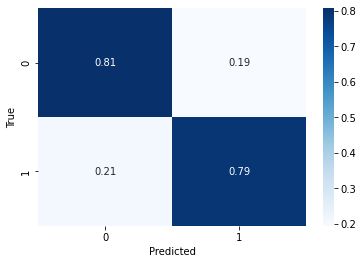

In [29]:
predicted_solved = hdf_results["LED3Chembl200kScorer"] > 0.5
solved = hdf_results["is_solved"]

print("LED3Chembl200kScorer SCORER AND ZINC BUILDING BLOCKS --> EVALUATION IS NOT CORRECT")
# calculate the accuracy
from sklearn.metrics import accuracy_score
print("The accuracy: ", accuracy_score(solved, predicted_solved))

# calculate the precision
from sklearn.metrics import precision_score
print("The precision: ", precision_score(solved, predicted_solved))

# calculate the recall
from sklearn.metrics import recall_score
print("The recall: ", recall_score(solved, predicted_solved))

# calculate the f1 score
from sklearn.metrics import f1_score
print("The f1 score: ", f1_score(solved, predicted_solved))

# calculate the mcc
from sklearn.metrics import matthews_corrcoef
print("The mcc: ", matthews_corrcoef(solved, predicted_solved))

# visualize the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# normalized

confusion_matrix = confusion_matrix(solved, predicted_solved)
confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, numpy.newaxis]
sns.heatmap(confusion_matrix, annot=True, cmap="Blues", fmt=".2f")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [ ]:
## clustering

In [ ]:
from multiretro.data.logic.fingerprints.fingerprints import BinaryMorganFingerprint
from multiretro.data.logic.fingerprints.fingerprint_generator import FingerprintGenerator
from multiretro.visualization.logic.umapVisualization import UmapVisualizer

# generate fingerprints
morganFingerprint = BinaryMorganFingerprint(transform_to_numpy_array=False, radius=2, number_of_bits= 1024, use_features= False)
fingerprint_generator = FingerprintGenerator(fingerprint = morganFingerprint)
clustered_azf_results = fingerprint_generator.create_fingerprints_pandas_dataframe(data_frame = hdf_results, smiles_column = "target", fingerprint_column = "fingerprint")

umapVisualizer = UmapVisualizer(dataFrame=clustered_azf_results, dimensions=2)
umapVisualizer.transformRdkitColumn2NumpyArray(columnName="fingerprint", newColumnName="fingerprint_numpy_array")
umapVisualizer.transformNumpyArrayColumnn2NumpyMatrix(columnName="fingerprint_numpy_array")
umapVisualizer.calculateUmapMapper()
umapVisualizer.extractUmapEmbeddings()
#umapVisualizer.calculateMarkerSize(boolean_row = "Centroid")
umapDataFrame = umapVisualizer.getVisualizationDataFrame()
umapDataFrame = umapDataFrame.reset_index(drop = True)

# multiply the max_transforms by -1
umapDataFrame["number_of_steps_marker"] = umapDataFrame["number_of_steps"] * -1

# minmax scale the max_transforms_marker column
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(5, 25))
umapDataFrame["number_of_steps_marker"] = scaler.fit_transform(umapDataFrame[["number_of_steps_marker"]])
umapDataFrame["real_index"] = umapDataFrame.index.to_list()

# visualize the molecules
#umapVisualizer = UmapVisualizer(dataFrame=umapDataFrame)
#app = umapVisualizer.createMolPlotlyVisualization(smilesColumn = 'target', maximumMarkerSize = 25, size = "number_of_steps_marker", colorColumn = "is_solved", captionColumns = ["real_index", "is_solved","target","number_of_steps","LED3Scorer","XGBClassifier","XGBRegressor"])
#app.run_server(mode='jupyterlab',host='0.0.0.0', port=8000, debug=False, proxy=None, use_reloader=False)


# On Alice: ssh -L 8000:localhost:8000 node802
# At Home: ssh -L 8000:localhost:8000 hpc1

In [18]:
print(umapDataFrame.columns)

umapDataFrame = umapDataFrame.drop(columns=['trees', 'fingerprint', 'fingerprint_numpy_array'])
print(len(umapDataFrame))
umapDataFrame.head()

Index(['index', 'target', 'search_time', 'first_solution_time',
       'first_solution_iteration', 'number_of_nodes', 'max_transforms',
       'max_children', 'number_of_routes', 'number_of_solved_routes',
       'top_score', 'is_solved', 'number_of_steps', 'number_of_precursors',
       'number_of_precursors_in_stock', 'precursors_in_stock',
       'precursors_not_in_stock', 'precursors_availability',
       'policy_used_counts', 'profiling', 'top_scores', 'trees',
       'target_inchi', 'LED3Chembl200kScorer', 'XGBClassifier', 'XGBRegressor',
       'SA', 'clean_smiles_inchi', 'fingerprint', 'fingerprint_numpy_array',
       'x', 'y', 'number_of_steps_marker', 'real_index'],
      dtype='object')
100000


,index,target,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,...,target_inchi,LED3Chembl200kScorer,XGBClassifier,XGBRegressor,SA,clean_smiles_inchi,x,y,number_of_steps_marker,real_index
0,0,Cc1cccc(Oc2ccc(CN3CCN(C(=O)OC(C(F)(F)F)C(F)(F)...,29.017107,29.017039,20,114,7,5,27,1,...,InChI=1S/C22H22F6N2O3/c1-15-3-2-4-18(13-15)32-...,0.986599,0.951234,7.251957,2.446728,InChI=1S/C22H22F6N2O3/c1-15-3-2-4-18(13-15)32-...,9.609011,8.630218,17.0,0
1,1,N#Cc1ccc(CN2CCN(C(=O)OC(C(F)(F)F)C(F)(F)F)CC2)cc1,7.959567,7.959505,5,21,6,4,5,1,...,"InChI=1S/C16H15F6N3O2/c17-15(18,19)13(16(20,21...",0.978048,0.971914,7.514136,2.491824,"InChI=1S/C16H15F6N3O2/c17-15(18,19)13(16(20,21...",9.282848,8.678146,23.0,1
2,2,O=C(OC1Oc2ccc(C(O)(C(F)(F)F)C(F)(F)F)cc2O1)C1C...,902.414820,0.000000,0,4499,10,24,1006,0,...,"InChI=1S/C20H15F12NO7/c21-17(22,23)13(18(24,25...",0.286235,0.911148,7.518158,3.892765,"InChI=1S/C20H15F12NO7/c21-17(22,23)13(18(24,25...",7.640357,10.324809,9.0,2
3,3,Cc1ccccc1C1CN(C(=O)n2nnc3ccccc32)CCN1,28.268931,28.268859,17,187,10,17,31,1,...,InChI=1S/C18H19N5O/c1-13-6-2-3-7-14(13)16-12-2...,0.735008,0.967543,7.543328,2.930797,InChI=1S/C18H19N5O/c1-13-6-2-3-7-14(13)16-12-2...,1.284078,4.924259,9.0,3
4,4,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCN(Nc2ccc(F)c(Cl)c...,51.809093,51.809027,23,288,10,17,74,1,...,InChI=1S/C14H13ClF7N3O2/c15-9-7-8(1-2-10(9)16)...,0.946415,0.974222,7.636827,2.810514,InChI=1S/C14H13ClF7N3O2/c15-9-7-8(1-2-10(9)16)...,8.789476,9.120907,15.0,4


In [19]:
save_path = "<PATH>/led3_score/data/results/3_molecular_generation/generated_molecules/full_model/used_scorer/chembl200k_led3/planning_results/zinc_building_blocks/ZINC_BB_Q99685_LED3SCORE_CHEMBL200K_FULL_MODEL_results.csv"
#umapDataFrame.to_csv(save_path)

## desired molecules (LED3Chembl200kScorer, XGBClassifier > 0.8)

In [20]:
xgb_molecules = hdf_results[hdf_results["XGBClassifier"] > 0.8]
print("The number of molecules with a XGBClassifier score higher than 0.8: ", len(xgb_molecules))

xgb_molecules_solved = xgb_molecules[xgb_molecules["is_solved"] == True]
print("The number of molecules with a XGBClassifier score higher than 0.8 and are solved: ", len(xgb_molecules_solved))

led3_molecules = hdf_results[hdf_results["LED3Chembl200kScorer"] > 0.8]
print("The number of molecules with a LED3Chembl200kScorer score higher than 0.8: ", len(led3_molecules))
short_list = hdf_results[(hdf_results["LED3Chembl200kScorer"] > 0.8) & (hdf_results["XGBClassifier"] > 0.8)]
print("The number of molecules with a LED3Chembl200kScorer score higher than 0.8 and a XGBClassifier score higher than 0.8: ", len(short_list))

short_list_solved = short_list[short_list["is_solved"] == True]
print("The number of molecules with a LED3Chembl200kScorer score higher than 0.8 and a XGBClassifier score higher than 0.8 and are solved: ", len(short_list_solved))

The number of molecules with a XGBClassifier score higher than 0.8:  64913
The number of molecules with a XGBClassifier score higher than 0.8 and are solved:  21732
The number of molecules with a LED3Chembl200kScorer score higher than 0.8:  26229
The number of molecules with a LED3Chembl200kScorer score higher than 0.8 and a XGBClassifier score higher than 0.8:  18307
The number of molecules with a LED3Chembl200kScorer score higher than 0.8 and a XGBClassifier score higher than 0.8 and are solved:  13597


In [21]:
# reset index of shortlist
short_list = short_list.reset_index(drop = True)
short_list.head()

,index,target,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,...,target_inchi,LED3Chembl200kScorer,XGBClassifier,XGBRegressor,SA,clean_smiles_inchi,fingerprint,fingerprint_numpy_array,x,y
0,0,Cc1cccc(Oc2ccc(CN3CCN(C(=O)OC(C(F)(F)F)C(F)(F)...,29.017107,29.017039,20,114,7,5,27,1,...,InChI=1S/C22H22F6N2O3/c1-15-3-2-4-18(13-15)32-...,0.986599,0.951234,7.251957,2.446728,InChI=1S/C22H22F6N2O3/c1-15-3-2-4-18(13-15)32-...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, True, False, False, False, False, Fals...",9.609011,8.630218
1,1,N#Cc1ccc(CN2CCN(C(=O)OC(C(F)(F)F)C(F)(F)F)CC2)cc1,7.959567,7.959505,5,21,6,4,5,1,...,"InChI=1S/C16H15F6N3O2/c17-15(18,19)13(16(20,21...",0.978048,0.971914,7.514136,2.491824,"InChI=1S/C16H15F6N3O2/c17-15(18,19)13(16(20,21...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, True, False, False, False, False, Fals...",9.282848,8.678146
2,4,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCN(Nc2ccc(F)c(Cl)c...,51.809093,51.809027,23,288,10,17,74,1,...,InChI=1S/C14H13ClF7N3O2/c15-9-7-8(1-2-10(9)16)...,0.946415,0.974222,7.636827,2.810514,InChI=1S/C14H13ClF7N3O2/c15-9-7-8(1-2-10(9)16)...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, True, False, False, False, False, Fals...",8.789476,9.120907
3,5,O=CC1(Oc2ccccc2)CCN(C(=O)n2nnc3ccccc32)CC1,0.722860,0.722793,1,7,5,1,1,1,...,InChI=1S/C19H18N4O3/c24-14-19(26-15-6-2-1-3-7-...,0.970036,0.954603,7.580662,2.878451,InChI=1S/C19H18N4O3/c24-14-19(26-15-6-2-1-3-7-...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal...",0.717334,5.394235
4,9,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCN(Cc2nc3ccccc3s2)CC1,2.618712,2.618646,3,11,6,3,3,1,...,"InChI=1S/C16H15F6N3O2S/c17-15(18,19)13(16(20,2...",0.956172,0.981139,8.006834,2.597285,"InChI=1S/C16H15F6N3O2S/c17-15(18,19)13(16(20,2...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, True, False, False, False, False, Fals...",1.908524,6.406579


In [22]:
provided_short_list = "<PATH>/led3_score/data/results/3_molecular_generation/generated_molecules/full_model/used_scorer/chembl200k_led3/generated_molecules/Q99685_chembl200k_led3score_400ep_final_shortlist.csv"
provided_short_list = pandas.read_csv(provided_short_list)
print(len(provided_short_list))
provided_short_list["clean_smiles_inchi"] = provided_short_list["SMILES"].apply(calculate_inchi)
provided_short_list.head()

18307


,SMILES,LED3Scorer,XGBClassifier,XGBRegressor,SA,closest_training_molecule_similarity,closest_training_molecule,clean_smiles_inchi
0,Cc1cccc(Oc2ccc(CN3CCN(C(=O)OC(C(F)(F)F)C(F)(F)...,0.986599,0.951234,7.251957,2.446728,0.604938,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCN(Cc2cccc(Oc3cccc...,InChI=1S/C22H22F6N2O3/c1-15-3-2-4-18(13-15)32-...
1,N#Cc1ccc(CN2CCN(C(=O)OC(C(F)(F)F)C(F)(F)F)CC2)cc1,0.978048,0.971914,7.514136,2.491824,0.700000,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCN(Cc2ccc(Cl)cc2)CC1,"InChI=1S/C16H15F6N3O2/c17-15(18,19)13(16(20,21..."
2,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCN(Nc2ccc(F)c(Cl)c...,0.946415,0.974222,7.636827,2.810514,0.432432,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCN(Cc2ccc(Cl)cc2)CC1,InChI=1S/C14H13ClF7N3O2/c15-9-7-8(1-2-10(9)16)...
3,O=CC1(Oc2ccccc2)CCN(C(=O)n2nnc3ccccc32)CC1,0.970036,0.954603,7.580662,2.878451,0.517241,O=C(N1CCN(Cc2ccc(Oc3ccccc3)cc2)CC1)n1nnc2c1cccc2,InChI=1S/C19H18N4O3/c24-14-19(26-15-6-2-1-3-7-...
4,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCN(Cc2nc3ccccc3s2)CC1,0.956172,0.981139,8.006834,2.597285,0.473684,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCN(Cc2ccc(Cl)cc2)CC1,"InChI=1S/C16H15F6N3O2S/c17-15(18,19)13(16(20,2..."


In [23]:
# assert that the short_list and provided_short_list are the same target_inchi and clean_smiles_inchi
assert (short_list["target_inchi"] == provided_short_list["clean_smiles_inchi"]).all(), "The target column and clean_smiles columns INCHIS are not the same"

In [24]:
short_list["closest_training_molecule_similarity"] = provided_short_list["closest_training_molecule_similarity"]
short_list["closest_training_molecule"] = provided_short_list["closest_training_molecule"]
short_list.head()

,index,target,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,...,XGBClassifier,XGBRegressor,SA,clean_smiles_inchi,fingerprint,fingerprint_numpy_array,x,y,closest_training_molecule_similarity,closest_training_molecule
0,0,Cc1cccc(Oc2ccc(CN3CCN(C(=O)OC(C(F)(F)F)C(F)(F)...,29.017107,29.017039,20,114,7,5,27,1,...,0.951234,7.251957,2.446728,InChI=1S/C22H22F6N2O3/c1-15-3-2-4-18(13-15)32-...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, True, False, False, False, False, Fals...",9.609011,8.630218,0.604938,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCN(Cc2cccc(Oc3cccc...
1,1,N#Cc1ccc(CN2CCN(C(=O)OC(C(F)(F)F)C(F)(F)F)CC2)cc1,7.959567,7.959505,5,21,6,4,5,1,...,0.971914,7.514136,2.491824,"InChI=1S/C16H15F6N3O2/c17-15(18,19)13(16(20,21...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, True, False, False, False, False, Fals...",9.282848,8.678146,0.700000,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCN(Cc2ccc(Cl)cc2)CC1
2,4,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCN(Nc2ccc(F)c(Cl)c...,51.809093,51.809027,23,288,10,17,74,1,...,0.974222,7.636827,2.810514,InChI=1S/C14H13ClF7N3O2/c15-9-7-8(1-2-10(9)16)...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, True, False, False, False, False, Fals...",8.789476,9.120907,0.432432,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCN(Cc2ccc(Cl)cc2)CC1
3,5,O=CC1(Oc2ccccc2)CCN(C(=O)n2nnc3ccccc32)CC1,0.722860,0.722793,1,7,5,1,1,1,...,0.954603,7.580662,2.878451,InChI=1S/C19H18N4O3/c24-14-19(26-15-6-2-1-3-7-...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal...",0.717334,5.394235,0.517241,O=C(N1CCN(Cc2ccc(Oc3ccccc3)cc2)CC1)n1nnc2c1cccc2
4,9,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCN(Cc2nc3ccccc3s2)CC1,2.618712,2.618646,3,11,6,3,3,1,...,0.981139,8.006834,2.597285,"InChI=1S/C16H15F6N3O2S/c17-15(18,19)13(16(20,2...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, True, False, False, False, False, Fals...",1.908524,6.406579,0.473684,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCN(Cc2ccc(Cl)cc2)CC1


In [25]:
# print the number of molecules in the short list
print("The number of molecules in the short list: ", len(short_list))

# get the number of molecules in the short list that are solved
print("The number of molecules in the short list that are solved:", len(short_list[short_list["is_solved"] == True]))

# percentage of solved molecules in the short list
print("The percentage of solved molecules in the short list: ", len(short_list[short_list["is_solved"] == True]) / len(short_list))

The number of molecules in the short list:  18307
The number of molecules in the short list that are solved: 13597
The percentage of solved molecules in the short list:  0.7427213634129022


<AxesSubplot:>

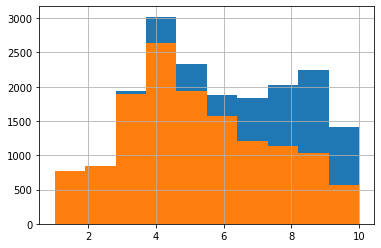

In [26]:
# hist of the number of steps for the short list
short_list["number_of_steps"].hist()

# hist in the short list that are solved
short_list[short_list["is_solved"] == True]["number_of_steps"].hist()

In [ ]:
short_list[short_list["is_solved"] == True]["closest_training_molecule_similarity"].hist()

In [27]:
# solved and tanimoto similarity < 0.6

short_list["solved_and_unique"] = short_list["is_solved"] & (short_list["closest_training_molecule_similarity"] < 0.6)

# get index 9779 row
short_list[short_list.index == 9779]

,index,target,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,...,XGBRegressor,SA,clean_smiles_inchi,fingerprint,fingerprint_numpy_array,x,y,closest_training_molecule_similarity,closest_training_molecule,solved_and_unique
9779,3,O=C(N1CCN(c2cccc(Oc3ccccc3)c2F)CC1)n1nnc2ccccc21,0.328215,0.328146,1,6,4,2,2,2,...,7.223941,2.363481,InChI=1S/C23H20FN5O2/c24-22-20(11-6-12-21(22)3...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal...",-0.194007,3.328385,0.583333,O=C(N1CCN(c2ccccc2F)CC1)n1nnc2ccccc21,True


## umap clustering

In [ ]:
from multiretro.data.logic.fingerprints.fingerprints import BinaryMorganFingerprint
from multiretro.data.logic.fingerprints.fingerprint_generator import FingerprintGenerator
from multiretro.visualization.logic.umapVisualization import UmapVisualizer

# generate fingerprints
morganFingerprint = BinaryMorganFingerprint(transform_to_numpy_array=False, radius=2, number_of_bits= 1024, use_features= False)
fingerprint_generator = FingerprintGenerator(fingerprint = morganFingerprint)
clustered_azf_results = fingerprint_generator.create_fingerprints_pandas_dataframe(data_frame = short_list, smiles_column = "target", fingerprint_column = "fingerprint")

umapVisualizer = UmapVisualizer(dataFrame=clustered_azf_results, dimensions=2)
umapVisualizer.transformRdkitColumn2NumpyArray(columnName="fingerprint", newColumnName="fingerprint_numpy_array")
umapVisualizer.transformNumpyArrayColumnn2NumpyMatrix(columnName="fingerprint_numpy_array")
umapVisualizer.calculateUmapMapper()
umapVisualizer.extractUmapEmbeddings()
#umapVisualizer.calculateMarkerSize(boolean_row = "Centroid")
umapDataFrame = umapVisualizer.getVisualizationDataFrame()
umapDataFrame = umapDataFrame.reset_index(drop = True)

# multiply the max_transforms by -1
umapDataFrame["number_of_steps_marker"] = umapDataFrame["number_of_steps"] * -1

# minmax scale the max_transforms_marker column
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(5, 25))
umapDataFrame["number_of_steps_marker"] = scaler.fit_transform(umapDataFrame[["number_of_steps_marker"]])
umapDataFrame["real_index"] = umapDataFrame.index.to_list()

# visualize the molecules
#umapVisualizer = UmapVisualizer(dataFrame=umapDataFrame)
#app = umapVisualizer.createMolPlotlyVisualization(smilesColumn = 'target', maximumMarkerSize = 25, size = "number_of_steps_marker", colorColumn = "solved_and_unique", captionColumns = ["real_index", "is_solved","target","number_of_steps","LED3Scorer","XGBClassifier","XGBRegressor", "closest_training_molecule_similarity", "closest_training_molecule"])
#app.run_server(mode='jupyterlab',host='0.0.0.0', port=8000, debug=False, proxy=None, use_reloader=False)


# On Alice: ssh -L 8000:localhost:8000 node802
# At Home: ssh -L 8000:localhost:8000 hpc1


In [30]:
print(umapDataFrame.columns)

Index(['index', 'target', 'search_time', 'first_solution_time',
       'first_solution_iteration', 'number_of_nodes', 'max_transforms',
       'max_children', 'number_of_routes', 'number_of_solved_routes',
       'top_score', 'is_solved', 'number_of_steps', 'number_of_precursors',
       'number_of_precursors_in_stock', 'precursors_in_stock',
       'precursors_not_in_stock', 'precursors_availability',
       'policy_used_counts', 'profiling', 'top_scores', 'trees',
       'target_inchi', 'LED3Chembl200kScorer', 'XGBClassifier', 'XGBRegressor',
       'SA', 'clean_smiles_inchi', 'fingerprint', 'fingerprint_numpy_array',
       'x', 'y', 'closest_training_molecule_similarity',
       'closest_training_molecule', 'solved_and_unique',
       'number_of_steps_marker', 'real_index'],
      dtype='object')


In [31]:
print(umapDataFrame.columns)

# remove 'trees', 'molecule_results', 'fingerprint', 'fingerprint_numpy_array', columns
umapDataFrame = umapDataFrame.drop(columns=['trees', 'fingerprint', 'fingerprint_numpy_array'])

umapDataFrame.head()

Index(['index', 'target', 'search_time', 'first_solution_time',
       'first_solution_iteration', 'number_of_nodes', 'max_transforms',
       'max_children', 'number_of_routes', 'number_of_solved_routes',
       'top_score', 'is_solved', 'number_of_steps', 'number_of_precursors',
       'number_of_precursors_in_stock', 'precursors_in_stock',
       'precursors_not_in_stock', 'precursors_availability',
       'policy_used_counts', 'profiling', 'top_scores', 'trees',
       'target_inchi', 'LED3Chembl200kScorer', 'XGBClassifier', 'XGBRegressor',
       'SA', 'clean_smiles_inchi', 'fingerprint', 'fingerprint_numpy_array',
       'x', 'y', 'closest_training_molecule_similarity',
       'closest_training_molecule', 'solved_and_unique',
       'number_of_steps_marker', 'real_index'],
      dtype='object')


,index,target,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,...,XGBRegressor,SA,clean_smiles_inchi,x,y,closest_training_molecule_similarity,closest_training_molecule,solved_and_unique,number_of_steps_marker,real_index
0,0,Cc1cccc(Oc2ccc(CN3CCN(C(=O)OC(C(F)(F)F)C(F)(F)...,29.017107,29.017039,20,114,7,5,27,1,...,7.251957,2.446728,InChI=1S/C22H22F6N2O3/c1-15-3-2-4-18(13-15)32-...,13.284453,8.371957,0.604938,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCN(Cc2cccc(Oc3cccc...,False,18.333333,0
1,1,N#Cc1ccc(CN2CCN(C(=O)OC(C(F)(F)F)C(F)(F)F)CC2)cc1,7.959567,7.959505,5,21,6,4,5,1,...,7.514136,2.491824,"InChI=1S/C16H15F6N3O2/c17-15(18,19)13(16(20,21...",12.252250,8.716534,0.700000,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCN(Cc2ccc(Cl)cc2)CC1,False,25.000000,1
2,4,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCN(Nc2ccc(F)c(Cl)c...,51.809093,51.809027,23,288,10,17,74,1,...,7.636827,2.810514,InChI=1S/C14H13ClF7N3O2/c15-9-7-8(1-2-10(9)16)...,8.672328,7.784143,0.432432,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCN(Cc2ccc(Cl)cc2)CC1,True,16.111111,2
3,5,O=CC1(Oc2ccccc2)CCN(C(=O)n2nnc3ccccc32)CC1,0.722860,0.722793,1,7,5,1,1,1,...,7.580662,2.878451,InChI=1S/C19H18N4O3/c24-14-19(26-15-6-2-1-3-7-...,-4.725343,8.680632,0.517241,O=C(N1CCN(Cc2ccc(Oc3ccccc3)cc2)CC1)n1nnc2c1cccc2,True,16.111111,3
4,9,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCN(Cc2nc3ccccc3s2)CC1,2.618712,2.618646,3,11,6,3,3,1,...,8.006834,2.597285,"InChI=1S/C16H15F6N3O2S/c17-15(18,19)13(16(20,2...",6.878592,11.753752,0.473684,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCN(Cc2ccc(Cl)cc2)CC1,True,25.000000,4


In [32]:
umapDataFrame.to_csv("<PATH>/led3_score/data/results/3_molecular_generation/generated_molecules/full_model/used_scorer/chembl200k_led3/planning_results/zinc_building_blocks/ZINC_BB_Q99685_LED3SCORE_CHEMBL200K_FULL_MODEL_results_shortlist.csv")